In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from time import time
from datetime import timedelta
import mercury as mr 
import warnings
from IPython.display import Markdown
warnings.filterwarnings('ignore')

In [2]:
app = mr.App(title="Round 1 Analysis")

event_name = "Event name"
event_year = "2023"
data_source = "https://www.sportident.co.uk/results/WBE/2023/Round1/"

mercury.App

In [3]:
markdown_text = f'''<font size="7">This page analyses the {event_year} {event_name} mountain bike race.  </font>

<font size="3">The first section looks at the results of the race by a number of metrics. The second section analyses just the competitors named in the box. Put your list of riders in to see how they compare on metrics that account for performance relative to class entered and metrics that discard outlying stages such as those affected by mechanical failures or falls. 

All data is from {data_source}. Any names entered must match those exactly. Note: Roots and Rain names are sometimes different to those on sportident. 

Any questions, please email mulholland.william@gmail.com with the subject: mtb Analysis question.

If this page is of more than fleeting interest, please consider donating to the air ambulance service: https://theairambulanceservice.org.uk

 </font>'''

display(Markdown(markdown_text))

<font size="7">This page analyses the 2023 Western Bike Events Rnd 1 Taff Buggy mountain bike race.  </font>

<font size="3">The first section looks at the results of the race by a number of metrics. The second section analyses just the competitors named in the box. Put your list of riders in to see how they compare on metrics that account for performance relative to class entered and metrics that discard outlying stages such as those affected by mechanical failures or falls. 

All data is from https://www.sportident.co.uk/results/WBE/2023/Round1/. Any names entered must match those exactly. Note: Roots and Rain names are sometimes different to those on sportident. 

Any questions, please email mulholland.william@gmail.com with the subject: mtb Analysis question.

If this page is of more than fleeting interest, please consider donating to the air ambulance service: https://theairambulanceservice.org.uk

 </font>

In [4]:
#read the results data from the site
#this needs to be a csv from sportident, adn needs to obey some rules. 
df = pd.read_csv("Round_1_results.csv", index_col=1)
df = df[df['Time'] != 'DNF']


for string_to_strip in ['Facebook', 'Twitter', 'Instagram']:
    df['Name'] = df['Name'].str.replace(string_to_strip, '', case=False).str.strip()

In [6]:
#convert time column from strings to datetime and calculate time/stageWinners time by stage
tZero = datetime.strptime("0:0.0", "%M:%S.%f")
tForNotDoingStage= timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=10, hours=0, weeks=0)

def stringTimeToSeconds(x):
    try:
        t = datetime.strptime(x, "%M:%S.%f") - tZero
    except:
        return tForNotDoingStage.seconds
    return t.microseconds/1e6 + t.seconds

categories = pd.Series.unique(df.Class)

def normalizedTimeFromColName(colName):
    if colName=='Overall_time':
        raceTime = df['Overall_time_seconds']
    else:
        raceTime = df[colName].apply(stringTimeToSeconds)
    
    winner = raceTime.min()
    normRaceTime = (raceTime/winner)
    return normRaceTime

def addNormTimeToDf(df,colName):
    if colName != "Overall_time":
        colName = df.columns[df.columns.str.contains(colName)][0]
    normtime = normalizedTimeFromColName(colName)
    name = colName + "_normalised"
    df[name] =  normtime
    return name

def colname_of_stage(df,p):
    return df.columns[df.columns.str.contains(p)][0]

def convertSecondsToTimespan(s):
    return str(timedelta(seconds=s))

stages = [colname_of_stage(df,i) for i in ['Stage 1', 'Stage 2', 'Stage 3']]

In [7]:
# add total time as a sum of stage times. 
df['Overall_time_seconds'] = df[stages].apply(np.vectorize(stringTimeToSeconds)).sum(axis=1)
df['Overall_time'] = df['Overall_time_seconds'].apply(np.vectorize(convertSecondsToTimespan))
stages = ['Overall_time'] + stages

In [8]:
normStages = [addNormTimeToDf(df,x) for x in stages]

<font size="5">   
Class winning times as a proportion of fastest time:</font>

In [9]:
#Do the same but by stage class winner's time
def stageMin(stage) :
    categories = pd.Series.unique(df.Class)
    categoriesMin = df.groupby('Class')[stage].min()
    return categoriesMin

normStages = pd.Series(normStages)
classMins = normStages.apply(stageMin)
classMins = classMins.set_index(normStages)
classMins

Class,Manual | Female Elite,Manual | Female Fun,Manual | Female Grand Vet,Manual | Female Master,Manual | Female Senior,Manual | Female U14,Manual | Female U18,Manual | Female Veteran,Manual | Male Elite,Manual | Male Fun,Manual | Male Grand Vet,Manual | Male Hardtail,Manual | Male Master,Manual | Male Senior,Manual | Male Super Vet,Manual | Male U14,Manual | Male U16,Manual | Male U18,Manual | Male Veteran
Overall_time_normalised,1.128440,1.687706,1.531009,1.424220,1.256514,1.954862,1.642936,1.457615,1.000000,1.220917,1.122936,1.114862,1.015413,1.048440,1.259817,1.154862,1.095780,1.067890,1.084404
Stage 1 : Best_normalised,1.126154,1.649231,1.537436,1.475897,1.242051,1.841026,1.574359,1.496410,1.000000,1.219487,1.122051,1.130256,1.035897,1.026667,1.284103,1.171282,1.111795,1.078974,1.098462
Stage 2: Best_normalised,1.135608,1.768154,1.545932,1.406824,1.279965,2.234471,1.748906,1.466317,1.000000,1.251969,1.126859,1.132108,1.025372,1.063867,1.240595,1.152231,1.101487,1.055118,1.069116
Stage 3: Best_normalised,1.152137,1.656410,1.548718,1.377778,1.282051,1.671795,1.611966,1.430769,1.006838,1.208547,1.148718,1.090598,1.000000,1.094017,1.304274,1.176068,1.099145,1.087179,1.095726


In [10]:
def stageClassFactor (stage, Class):
    return classMins.loc[stage][Class]  

def reNormByClass (stage) :  
    d = df[stage] / df['Class'].map(lambda x : stageClassFactor(stage, x))
    name = stage + "_by_class_winner_time"
    df[name] = (d)
    return name

classNormStages = [ reNormByClass(s) for s in normStages]

In [11]:
def percentileClipped(percentile, series):
    npA = (series.copy())
    npA2 = pd.Series.sort_values(npA)  
    total = int(npA2.count() * percentile) - 1
    clipped = npA2[:total]
    return(npA2[:total])

def clippedStdDev(percentile, normRaceTime):
    clipped = percentileClipped(percentile, normRaceTime)
    stDev = np.std(clipped)
    return stDev    

<font size="5">How did the top 70% of overall times compare to the fastest by stage? </font> 
  
<font size="3">Stages with greater range are the most important and most difficult (as they have the largest percent gap between the fastest and slowest riders) </font>

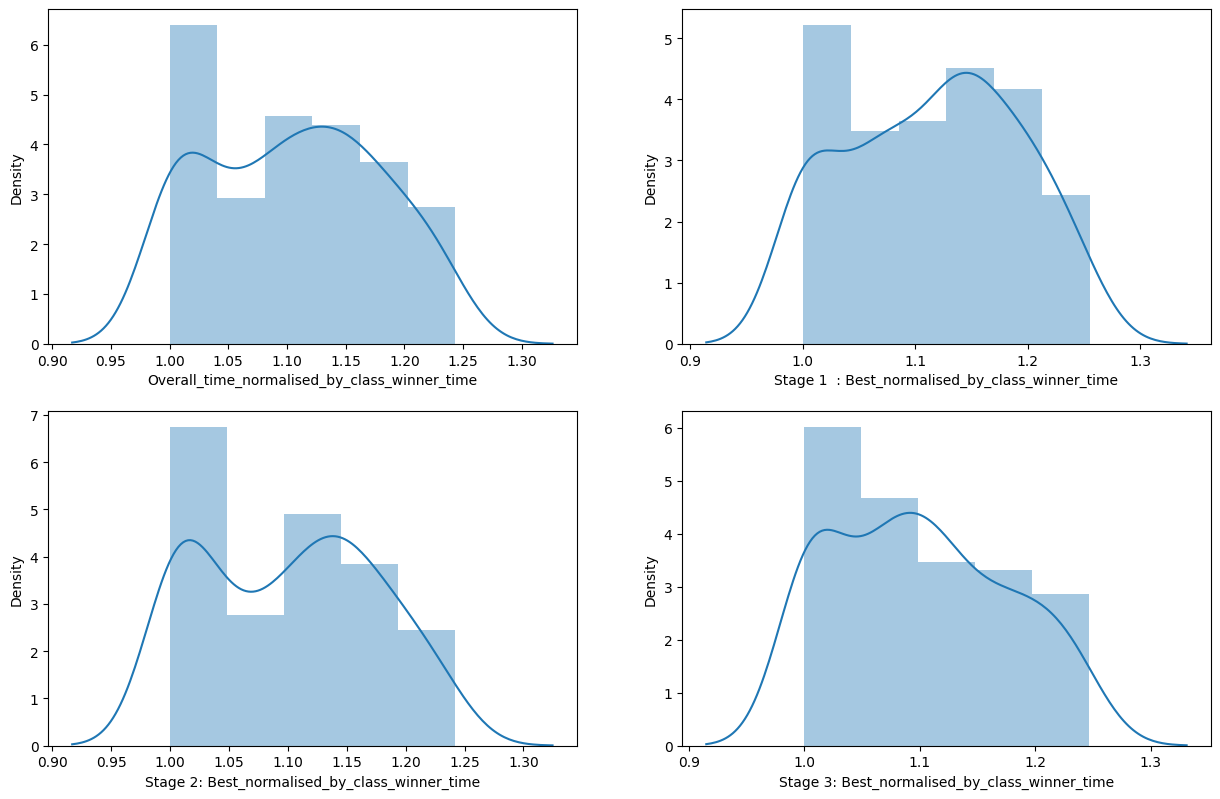

In [12]:
#distributions of the stages in one plot
percentile = 0.70
fig = plt.figure()

for i in range(min(8, len(stages))):
    fig.add_subplot(4,2,i+1)
    sns.distplot(percentileClipped(percentile, df[classNormStages[i]]))
    
fig.set_figwidth(15)
fig.set_figheight(20)

In [13]:
dfStageNorms = df[normStages[1:]]
df['Median'] = dfStageNorms.median(axis=1)
df['Min'] = dfStageNorms.min(axis=1)
df['StdDev'] = dfStageNorms.std(axis=1)

dfStageClassNorms = df[classNormStages[1:]]
df['Median_Class_Normalised'] = dfStageClassNorms.median(axis=1)
df['Min_Class_Normalised'] = dfStageClassNorms.min(axis=1)
df['Std_Class_Normalised'] = dfStageClassNorms.std(axis=1)

In [14]:
def calculatePositionOnSorted(measure):
    position = pd.Series(np.arange(pd.Series.count(df[measure])) + 1)
    sameMeasure = (df[measure] == df[measure].shift(1))

    j = [1]
    def previousPosIfEqual(i):
        if sameMeasure[i]:
            return j[0]
        else:
            j[0] = position[i]
            return position[i]
    
    pos  = [previousPosIfEqual(i) for i in (np.arange(pd.Series.count(df[measure])))]
    return pos

def addPositions(measure):
    df.sort_values(measure, inplace=True)
    name = 'Pos' + measure
    df[name] = calculatePositionOnSorted(measure)
    return name

positionFields = [addPositions(m) for m in ['Overall_time_normalised', 'Overall_time_normalised_by_class_winner_time', 'Median', 'Median_Class_Normalised',]]
df.sort_values('Overall_time_normalised', inplace=True)

<font size="5">Who were the class winners on time? </font>

In [15]:
dataToView = [ 'Name', 'Class'] + stages + list(normStages) + classNormStages + ['Median', 'Median_Class_Normalised', 'Min', 'Min_Class_Normalised']  + positionFields                                          
dataToView
dfToView = df[dataToView]

#the class winners
dfToView[dfToView['Overall_time_normalised_by_class_winner_time'] < 1.000001][['Name', 'Class', 'Overall_time']]

,Name,Class,Overall_time
Pos,,,
1st,Cai Grocott,Manual | Male Elite,0:04:32.500000
3rd,Charlie Collins,Manual | Male Master,0:04:36.700000
7th,Chris Hulley,Manual | Male Senior,0:04:45.700000
8th,Tod Buchanan,Manual | Male U18,0:04:51
9th,Tom Fryer,Manual | Male Veteran,0:04:55.500000
15th,Noah Killeen,Manual | Male U16,0:04:58.600000
24th,Tom Dunn,Manual | Male Hardtail,0:05:03.800000
26th,Ian Sanders,Manual | Male Grand Vet,0:05:06
29th,Becky Cook,Manual | Female Elite,0:05:07.500000


<font size="5">What if we discard outlying stages? </font>
  
<font size="3">If we take the stage results for each rider and pick only their middle result (the median), we discard any outlying slow (or fast) stages.</font>

In [16]:
# who were the top 10 median by class?
dfToView.sort_values('Median_Class_Normalised')[['Name', 'Class','Median_Class_Normalised', 'Overall_time']][0:20]

,Name,Class,Median_Class_Normalised,Overall_time
Pos,,,,
150th,Katie Bow,Manual | Female Master,1.000000,0:06:28.900000
90th,Ffion Brutnell,Manual | Female Senior,1.000000,0:05:42.400000
76th,James Hughes,Manual | Male Fun,1.000000,0:05:32.700000
183rd,Sarah Wilkes,Manual | Female Fun,1.000000,0:07:39.900000
182nd,Cari Morgan-Williams,Manual | Female U18,1.000000,0:07:27.700000
167th,Fiona McCormick,Manual | Female Grand Vet,1.000000,0:06:57.200000
158th,Sarah Morgan,Manual | Female Veteran,1.000000,0:06:37.200000
91st,David Gurnsey,Manual | Male Super Vet,1.000000,0:05:43.300000
42nd,Charlie Toomer,Manual | Male U14,1.000000,0:05:14.700000


In [17]:
competitors_list = mr.Text(label="Which competitors would you like to compare?", value="Tom Dunn, Charlie Collins, Ian Sanders, Thomas Mayers, Emily Ashwood")

mercury.Text

In [18]:
competitors_list = competitors_list.value.split(', ')

<font size="5">Section 2: Comparison of named competitors list</font>
  
<font size="3">Results ordered by overall time: note that any stages not completed were given a default time of 10 minutes. This will make this a bad metric: look at the median metrics for a more accurate analysis of riders who chose to miss stages. </font>

In [19]:
#index by name and select our group
dataNamed = dfToView.set_index('Name')

d = dataNamed.loc[competitors_list]

#show results ordered by race time
d.sort_values('Overall_time_normalised')[[ 'Class', 'Overall_time', 'Overall_time_normalised']]

,Class,Overall_time,Overall_time_normalised
Name,,,
Charlie Collins,Manual | Male Master,0:04:36.700000,1.015413
Tom Dunn,Manual | Male Hardtail,0:05:03.800000,1.114862
Ian Sanders,Manual | Male Grand Vet,0:05:06,1.122936
Thomas Mayers,Manual | Male Senior,0:05:13.100000,1.148991
Emily Ashwood,Manual | Female Elite,0:05:15.100000,1.156330


<font size="3">
  
Results ordered by overall time/class winner time  </font>

In [20]:
#show results ordered by race time
d.sort_values('Overall_time_normalised_by_class_winner_time')[[ 'Class', 'Overall_time_normalised_by_class_winner_time','Overall_time']]

,Class,Overall_time_normalised_by_class_winner_time,Overall_time
Name,,,
Tom Dunn,Manual | Male Hardtail,1.000000,0:05:03.800000
Charlie Collins,Manual | Male Master,1.000000,0:04:36.700000
Ian Sanders,Manual | Male Grand Vet,1.000000,0:05:06
Emily Ashwood,Manual | Female Elite,1.024715,0:05:15.100000
Thomas Mayers,Manual | Male Senior,1.095905,0:05:13.100000


<font size="3">
  
Results ordered by the fastest time/winners time on any stage (note: winner, not class winner)</font>

In [21]:
#results ordered by min stage time/stage winners time on any stage
d.sort_values('Min')[['Class','Min','Overall_time']]

,Class,Min,Overall_time
Name,,,
Charlie Collins,Manual | Male Master,1.000000,0:04:36.700000
Tom Dunn,Manual | Male Hardtail,1.090598,0:05:03.800000
Ian Sanders,Manual | Male Grand Vet,1.122051,0:05:06
Thomas Mayers,Manual | Male Senior,1.141732,0:05:13.100000
Emily Ashwood,Manual | Female Elite,1.152137,0:05:15.100000


<font size="3">
  
Results ordered by the fastest time/class winner time on any stage</font>

In [22]:
# as above but by class stage winners time
d.sort_values('Min_Class_Normalised')[['Class','Min_Class_Normalised','Overall_time']]

,Class,Min_Class_Normalised,Overall_time
Name,,,
Tom Dunn,Manual | Male Hardtail,1.000000,0:05:03.800000
Charlie Collins,Manual | Male Master,1.000000,0:04:36.700000
Ian Sanders,Manual | Male Grand Vet,1.000000,0:05:06
Emily Ashwood,Manual | Female Elite,1.000000,0:05:15.100000
Thomas Mayers,Manual | Male Senior,1.073191,0:05:13.100000


<font size="3">
  
Results ordered by the median of each riders time/winner time on all stages (note winner not class winner)</font>

In [23]:
# the results sorted by median (stage time/stage winners time)
d.sort_values('Median')[['Class','Median', 'Overall_time']]

,Class,Median,Overall_time
Name,,,
Charlie Collins,Manual | Male Master,1.025372,0:04:36.700000
Ian Sanders,Manual | Male Grand Vet,1.126859,0:05:06
Tom Dunn,Manual | Male Hardtail,1.130256,0:05:03.800000
Emily Ashwood,Manual | Female Elite,1.155731,0:05:15.100000
Thomas Mayers,Manual | Male Senior,1.167179,0:05:13.100000


<font size="3">
  
Results ordered by the median of each riders time/class winner time on all stages</font>

In [24]:

dz = d.sort_values('Median_Class_Normalised')[['Class','Median_Class_Normalised', 'Overall_time']] #['Class', 'Time', 'TimeNorm', 'TimeNormClassNorm', 'Median', 'MedianClassNorm' , 'Min' , 'MinClassNorm']
dz

,Class,Median_Class_Normalised,Overall_time
Name,,,
Tom Dunn,Manual | Male Hardtail,1.00000,0:05:03.800000
Charlie Collins,Manual | Male Master,1.00000,0:04:36.700000
Ian Sanders,Manual | Male Grand Vet,1.00000,0:05:06
Emily Ashwood,Manual | Female Elite,1.01772,0:05:15.100000
Thomas Mayers,Manual | Male Senior,1.07500,0:05:13.100000


In [25]:
d.sort_values('Overall_time_normalised')

,Class,Overall_time,Stage 1 : Best,Stage 2: Best,Stage 3: Best,Overall_time_normalised,Stage 1 : Best_normalised,Stage 2: Best_normalised,Stage 3: Best_normalised,Overall_time_normalised_by_class_winner_time,...,Stage 2: Best_normalised_by_class_winner_time,Stage 3: Best_normalised_by_class_winner_time,Median,Median_Class_Normalised,Min,Min_Class_Normalised,PosOverall_time_normalised,PosOverall_time_normalised_by_class_winner_time,PosMedian,PosMedian_Class_Normalised
Name,,,,,,,,,,,,,,,,,,,,,
Charlie Collins,Manual | Male Master,0:04:36.700000,01:41.0,01:57.2,00:58.5,1.015413,1.035897,1.025372,1.000000,1.000000,...,1.000000,1.000000,1.025372,1.00000,1.000000,1.000000,3,1,4,1
Tom Dunn,Manual | Male Hardtail,0:05:03.800000,01:50.2,02:09.8,01:03.8,1.114862,1.130256,1.135608,1.090598,1.000000,...,1.003091,1.000000,1.130256,1.00000,1.090598,1.000000,24,1,26,1
Ian Sanders,Manual | Male Grand Vet,0:05:06,01:49.4,02:08.8,01:07.8,1.122936,1.122051,1.126859,1.158974,1.000000,...,1.000000,1.008929,1.126859,1.00000,1.122051,1.000000,26,1,24,1
Thomas Mayers,Manual | Male Senior,0:05:13.100000,01:53.8,02:10.5,01:08.8,1.148991,1.167179,1.141732,1.176068,1.095905,...,1.073191,1.075000,1.167179,1.07500,1.141732,1.073191,37,62,42,47
Emily Ashwood,Manual | Female Elite,0:05:15.100000,01:55.6,02:12.1,01:07.4,1.156330,1.185641,1.155731,1.152137,1.024715,...,1.017720,1.000000,1.155731,1.01772,1.152137,1.000000,44,28,39,25
